In [1]:
%load_ext autoreload
%autoreload complete

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib_inline.backend_inline import set_matplotlib_formats
from tqdm.notebook import tqdm

set_matplotlib_formats("svg")

  0%|          | 0/112 [00:00<?, ?it/s]

Persisting input arguments took 0.61s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.


<Axes: title={'center': 'Causal effect of occ_protest on protest using magic'}, xlabel='Day of outcome', ylabel='Estimate'>

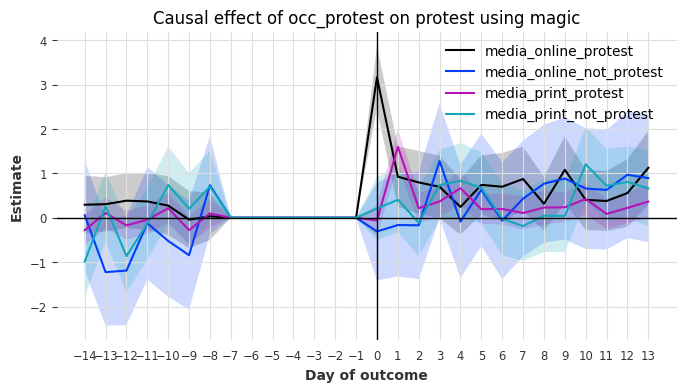

In [3]:
import warnings

from src.models.time_series import regression
from src.visualization.visualize import plot_impact_ts

warnings.filterwarnings("error")

treatment = "occ_protest"
_, results1 = regression(
    target="protest",
    lags=range(-7, 1),
    steps=range(-14, 14),
    cumulative=False,
    ignore_group=True,
)
plot_impact_ts(results1, treatment, "protest")

In [4]:
treatment = "occ_protest"
_, results1 = regression(
    target="protest",
    lags=range(-7, 1),
    steps=range(-14, 14),
    cumulative=True,
    ignore_group=True,
)
plot_impact_ts(results1, treatment, "protest")

  0%|          | 0/112 [00:00<?, ?it/s]

ValueError: window must be an integer 0 or greater

[autoreload of src.models.regression failed: Traceback (most recent call last):
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 274, in check
    superreload(m, reload, self.old_objects, self.shell)
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 397, in update_generic
    update(a, b)
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 365, in update_class
    update_instances(old, new)
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 323, in update_instances
    object.__setattr__(ref, "__class__", new)
TypeError

  0%|          | 0/28 [00:00<?, ?it/s]

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

<Axes: xlabel='Shift (days)', ylabel='Coefficient'>

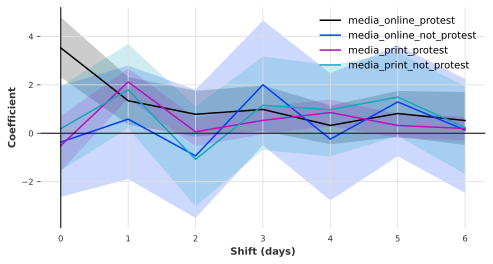

In [5]:
from src.features.time_series.lagged_impact import plot_lagged_impact
from src.models.regression import propensity_weighting

lags = list(range(-7, 1))
steps = 7
treatment = "occ_protest"
outcome = "protest"
cumulative = False
ignore_group = True

_, results1 = propensity_weighting(
    target=outcome,
    treatment=treatment,
    lags=lags,
    steps=steps,
    cumulative=cumulative,
    ignore_group=ignore_group,
)
plot_lagged_impact(results1, treatment, "protest")

In [ ]:
from src.features.time_series.lagged_impact import plot_lagged_impact
from src.models.regression import propensity_weighting

lags = list(range(-7, 1))
steps = 7
treatment = "occ_protest"
outcome = "protest"
cumulative = True
ignore_group = True

_, results2 = propensity_weighting(
    target=outcome,
    treatment=treatment,
    lags=lags,
    steps=steps,
    cumulative=cumulative,
    ignore_group=ignore_group,
)
plot_lagged_impact(results2, treatment, "protest")

<Axes: xlabel='Shift (days)', ylabel='Coefficient'>

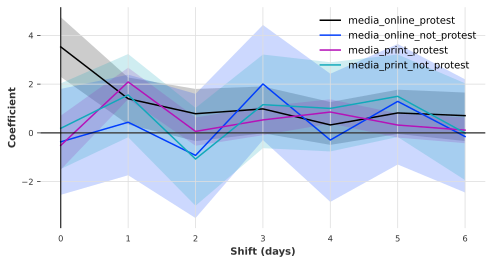

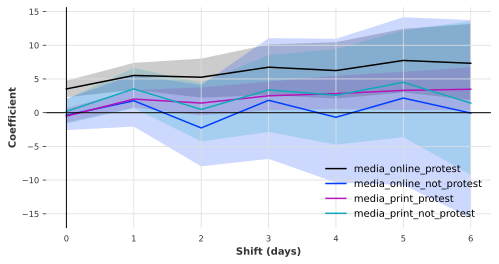

In [ ]:
plot_lagged_impact(results1, treatment, "protest")
plot_lagged_impact(results2, treatment, "protest")

  0%|          | 0/112 [00:00<?, ?it/s]

<Axes: xlabel='Shift (days)', ylabel='Coefficient'>

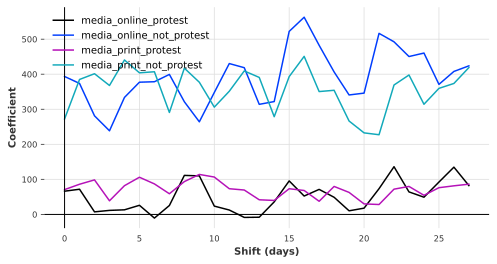

In [13]:
from src.features.time_series.lagged_impact import plot_lagged_impact
from src.models.regression import instrumental_variable

lags = list(range(0, 1))
steps = 28
treatment = "occ_protest"
outcome = "protest"
instrument = "weather_prcp"
cumulative = False
ignore_group = True

models, results1 = instrumental_variable(
    target=outcome,
    treatment=treatment,
    instrument=instrument,
    lags=lags,
    steps=steps,
    cumulative=cumulative,
    ignore_group=ignore_group,
)
plot_lagged_impact(results1, treatment, "protest", ci=False)

  0%|          | 0/28 [00:00<?, ?it/s]

<Axes: xlabel='Shift (days)', ylabel='Coefficient'>

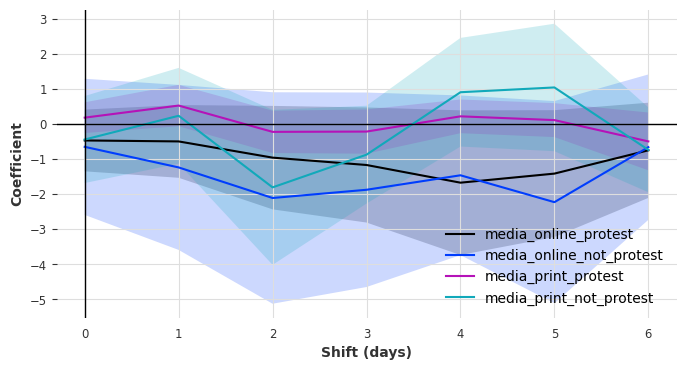

In [1]:
from src.features.time_series.lagged_impact import plot_lagged_impact
from src.models.regression import instrumental_variable_liml

treatment = "occ_protest"

models, results1 = instrumental_variable_liml(
    target="protest",
    treatment=treatment,
    instrument="weather_prcp",
    lags=list(range(-9, 1)),
    steps=7,
    cumulative=False,
    ignore_group=True,
    region_dummies=False,
    n_jobs=1,
)
plot_lagged_impact(results1, treatment, "protest", ci=True)